In [116]:
import pandas as pd
from matplotlib import pyplot as plt

In [117]:
peliculas = {'nombre': ['Titanic', 'Kil Bill', 'Matrix', 'El padrino', 'Avatar', 
                        'Casablanca', 'El exorcista',  'Soy leyenda', 
                        'El club de la pelea', 'Mujercitas'],
            'director': ['James Cameron', 'Quentin Tarantino', 'Hermanas Wachowski', 
                        'Francis Ford Coppola', 'James Cameron', 'Michael Curtiz',
                        'William Friedkin', 'Francis Lawrence','David Fincher', 
                        'Greta Gerwig'],
            'año': [1997, 2003, 1999, 1972, 2009, 1942, 1973, 2007, 1999, 2019],
            'género': ['romance', 'acción', 'ciencia ficción', 'drama', 'ciencia ficción', 'drama', 'terror', 
                        'ciencia ficción', 'drama', 'drama'],
            'puntaje': [8.6, None, 6.9, 7.5, 9.1, 6.0, None, None, 9.4, 8.0]}
df = pd.DataFrame(peliculas)
df

,nombre,director,año,género,puntaje
0,Titanic,James Cameron,1997,romance,8.6
1,Kil Bill,Quentin Tarantino,2003,acción,NaN
2,Matrix,Hermanas Wachowski,1999,ciencia ficción,6.9
3,El padrino,Francis Ford Coppola,1972,drama,7.5
4,Avatar,James Cameron,2009,ciencia ficción,9.1
5,Casablanca,Michael Curtiz,1942,drama,6.0
6,El exorcista,William Friedkin,1973,terror,NaN
7,Soy leyenda,Francis Lawrence,2007,ciencia ficción,NaN
8,El club de la pelea,David Fincher,1999,drama,9.4
9,Mujercitas,Greta Gerwig,2019,drama,8.0


Mostrar pelis de drama:

In [118]:
df[(df["género"] == "drama") & (df["puntaje"] >= 8.0) & (df["puntaje"] < 8.9)]

,nombre,director,año,género,puntaje
9,Mujercitas,Greta Gerwig,2019,drama,8.0


Muestre lista ordenada alfabeticamente por: nombre y director

In [119]:
df.sort_values(by=["nombre","director"], ascending=(True, True))

,nombre,director,año,género,puntaje
4,Avatar,James Cameron,2009,ciencia ficción,9.1
5,Casablanca,Michael Curtiz,1942,drama,6.0
8,El club de la pelea,David Fincher,1999,drama,9.4
6,El exorcista,William Friedkin,1973,terror,NaN
3,El padrino,Francis Ford Coppola,1972,drama,7.5
1,Kil Bill,Quentin Tarantino,2003,acción,NaN
2,Matrix,Hermanas Wachowski,1999,ciencia ficción,6.9
9,Mujercitas,Greta Gerwig,2019,drama,8.0
7,Soy leyenda,Francis Lawrence,2007,ciencia ficción,NaN
0,Titanic,James Cameron,1997,romance,8.6


Mostrar solo los NaN

In [120]:
df[df["puntaje"].isnull()]

,nombre,director,año,género,puntaje
1,Kil Bill,Quentin Tarantino,2003,acción,NaN
6,El exorcista,William Friedkin,1973,terror,NaN
7,Soy leyenda,Francis Lawrence,2007,ciencia ficción,NaN


Mostrar un grafico de los puntajes de las primeras 5 peliculas más vistas

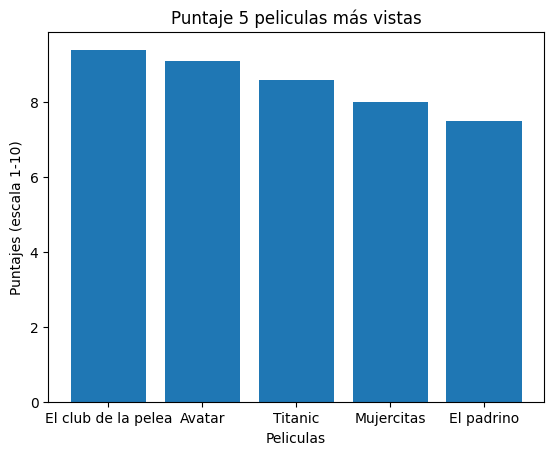

In [121]:

puntajes = df.sort_values(by=["puntaje"], ascending=(False))["puntaje"][:5]
nombres = df.sort_values(by=["puntaje"], ascending=(False))["nombre"][:5]

plt.bar(nombres, puntajes)

plt.xlabel("Peliculas")
plt.ylabel("Puntajes (escala 1-10)")

plt.title("Puntaje 5 peliculas más vistas")

plt.show()



Hacer un dataframe a partir del archivo datos_personas.csv y luego hacer un grafico con la media de edades por pais

Primero hacemos el diccionario (del que va salir el dataframe) a partir del archivo:

In [133]:
archivo = open("C:/Users/Lautaro/Desktop/python/ejercicios_variados_parcial_2/archivos/datos_personas.csv", "r", encoding="utf-8")
datos_personas_crudo = archivo.readlines()
archivo.close()

# print(datos_personas_crudo)

# Crea la lista con los datos generada por el CSV, quitando los ; y los \n
def crear_lista(datos_personas_crudo):
    datos_persona = []
    for datos in datos_personas_crudo:
        datos_persona.append(datos.strip("\n").split(","))
    return datos_persona

datos_personas = crear_lista(datos_personas_crudo)

# print(datos_personas)

# Separo las keys para el dicc de la lista de datos
keys = datos_personas[0]

# print(keys)

# Crea la lista de listas de valores para el dicc
def lista_final(lista):
    nombres, edad, oficio, nacionalidad, tipo_sangre, indice = [], [], [], [], [], 0
    valores_lista = [nombres, edad, oficio, nacionalidad, tipo_sangre]
    for datos in lista:
        for dato in datos:
            valores_lista[indice].append(dato)
            if indice == 4:
                indice = 0
                continue
            indice += 1
    return valores_lista

# Cargo los valores del dicc
values = lista_final(datos_personas[1:])

# print(values)

# Crea al dicc
datos = dict(zip(keys, values))

print(datos)


{'nombre': ['Juan', 'María', 'Carlos', 'Ana', 'Pedro', 'Laura', 'Diego', 'Sofía', 'Luis', 'Isabela'], 'edad': ['27', '62', '45', '35', '35', '33', '18', '56', '37', '21'], 'trabajo': ['Ingeniero', 'Médico', 'Abogado', 'Diseñadora', 'Programador', 'Periodista', 'Contador', 'Arquitecta', 'Profesor', 'Enfermera'], 'nacionalidad': ['Arg', 'Esp', 'Méx', 'Col', 'Ch', 'Pe', 'Bra', 'Uru', 'Ecu', 'Vnz'], 'grupo_sanguineo': ['A+', 'O-', 'B+', 'AB-', 'O+', 'A-', 'A+', 'B-', 'O-', 'AB+']}


In [123]:
#  Código original
archivo = open("C:/Users/Lautaro/Desktop/python/ejercicios_variados_parcial_2/archivos/datos_personas.csv", "r", encoding="utf-8")
datos_personas_crudo = archivo.readlines()
archivo.close()

# print(datos_personas_crudo)

datos_personas = []

# Crea la lista con los datos generada por el CSV, quitando los ; y los \n
def crear_lista(datos_personas_crudo):
    datos_persona = []
    for datos in datos_personas_crudo:
        datos = datos.strip("\n")
        datos = datos.split(",")
        datos_persona.append(datos)
    return datos_persona

datos_personas = crear_lista(datos_personas_crudo)

# print(datos_personas)

# Separo las keys para el dataframe de la lista de datos
keys = datos_personas[0]

datos_lista = datos_personas[1:]

valores = []

# Se paro cada uno de los datos para luego poder ponerlos en sus respectivas listas
def separar_lista(lista):
    valores = []
    for datos in lista:
        for dato in datos:
            valores.append(dato)
    return valores

valores = separar_lista(datos_lista)

# print(valores)

# Crea las listas de cada uno de los apartados del dataframe
def unir(lista):
    nombres, edad, oficio, nacionalidad, tipo_sangre, contador = [], [], [], [], [], 0
    for dato in lista:
        if contador == 0:
            nombres.append(dato)
        if contador == 1:
            edad.append(dato)
        if contador == 2:
            oficio.append(dato)
        if contador == 3:
            nacionalidad.append(dato)
        if contador == 4:
            tipo_sangre.append(dato)
            contador = 0
            continue
        contador += 1
    return nombres, edad, oficio, nacionalidad, tipo_sangre

# nombres, edad, oficio, nacionalidad, tipo_sangre = unir(valores)

# print(nombres)
# print(edad)
# print(oficio)
# print(nacionalidad)
# print(tipo_sangre)

# values = [nombres, edad, oficio, nacionalidad, tipo_sangre]

values = unir(valores)

# Crea al dataframe
datos = dict(zip(keys, values))

print(datos)

{'nombre': ['Juan', 'María', 'Carlos', 'Ana', 'Pedro', 'Laura', 'Diego', 'Sofía', 'Luis', 'Isabela'], 'edad': ['27', '62', '45', '35', '35', '33', '18', '56', '37', '21'], 'trabajo': ['Ingeniero', 'Médico', 'Abogado', 'Diseñadora', 'Programador', 'Periodista', 'Contador', 'Arquitecta', 'Profesor', 'Enfermera'], 'nacionalidad': ['Arg', 'Esp', 'Méx', 'Col', 'Ch', 'Pe', 'Bra', 'Uru', 'Ecu', 'Vnz'], 'grupo_sanguineo': ['A+', 'O-', 'B+', 'AB-', 'O+', 'A-', 'A+', 'B-', 'O-', 'AB+']}


Ahora creamos y manipulamos el dataframe:

In [124]:
datf_p = pd.DataFrame(datos)
datf_p


,nombre,edad,trabajo,nacionalidad,grupo_sanguineo
0,Juan,27,Ingeniero,Arg,A+
1,María,62,Médico,Esp,O-
2,Carlos,45,Abogado,Méx,B+
3,Ana,35,Diseñadora,Col,AB-
4,Pedro,35,Programador,Ch,O+
5,Laura,33,Periodista,Pe,A-
6,Diego,18,Contador,Bra,A+
7,Sofía,56,Arquitecta,Uru,B-
8,Luis,37,Profesor,Ecu,O-
9,Isabela,21,Enfermera,Vnz,AB+


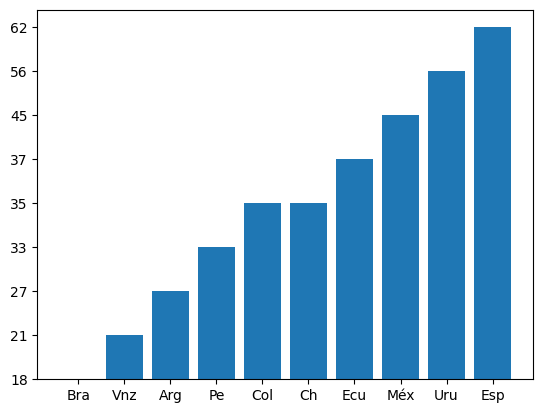

In [128]:
edades = datf_p.sort_values(by=["edad"], ascending=(True))["edad"]
nacionalidades = datf_p.sort_values(by=["edad"], ascending=(True))["nacionalidad"]

# print(edades)
# print(nacionalidades)

plt.bar(nacionalidades, edades)

plt.show()